# Contents

    01. Importing Libraries and Data
    02. Regional Analyses by Profile
        a. Age Profile Regional Distribution
        b. Income Profile Regional Distribution
        c. Pet Owners Profile Regional Distribution
        d. Single Caretakers Profile Regional Distribution
    03. Departmental Analysis by Profile
        a. Orders Made Per Department
        b. Age Profile
        c. Income Profile
        d. Pet Owners Profile
        e. Single Caretakers Profile
    04. Further Analyses
        a. Orders Per Hour - Line Chart
        b. Orders Per Day - Line Chart
        c. Price Per Hour - Line Chart
        d. Loyalty Status Distribution - Pie Chart
        e. Age Profile Loyalty Status Distribution - Pie Chart
        f. Income Profile Loyalty Status Distribution - Pie Chart
        g. Pet Owner Profile Loyalty Status Distribution - Pie Chart
        e. Single Caretaker Loyalty Status Distribution - Pie Chart
    05. Exporting Visualizations
    

# 01. Importing Libraries and Data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#import data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 4\08-2020 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'including_profiles.pkl'))

In [4]:
df.shape

(30964564, 38)

In [5]:
#removing duplicates to create a new data frame with only unique customers
df_nodup=df.drop_duplicates(subset='customer_id')

In [6]:
df_nodup.shape

(162631, 38)

# 02. Regional Analysis By Profiles


## Age Profile Regional Distribution

In [7]:
#creating crosstab for region and age group
age_region = pd.crosstab(df_nodup['region'],df_nodup['age_group'])

age_region_labels = pd.crosstab(index=df_nodup['region'],columns=df_nodup['age_group'])

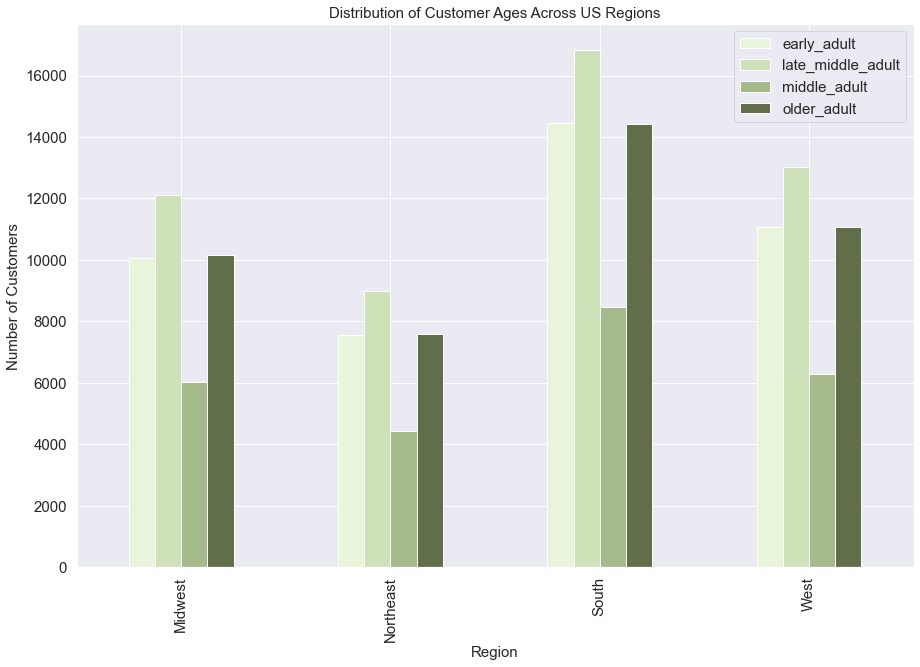

In [8]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart
bar_age_region=age_region.plot.bar(color=['#e9f5db', '#cfe1b9', '#a6b98b', '#606f49'], fontsize=15)
plt.title('Distribution of Customer Ages Across US Regions', fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.legend(fontsize=15)


## Income Profile Regional Distribution

In [9]:
#creating crosstab for region and age group
income_region = pd.crosstab(df_nodup['region'],df_nodup['income_group'])
income_region

income_group,high income,low income,middle income
region,,,
Midwest,3040,6372,28964
Northeast,2291,4761,21529
South,4338,9075,40780
West,3340,6923,31218


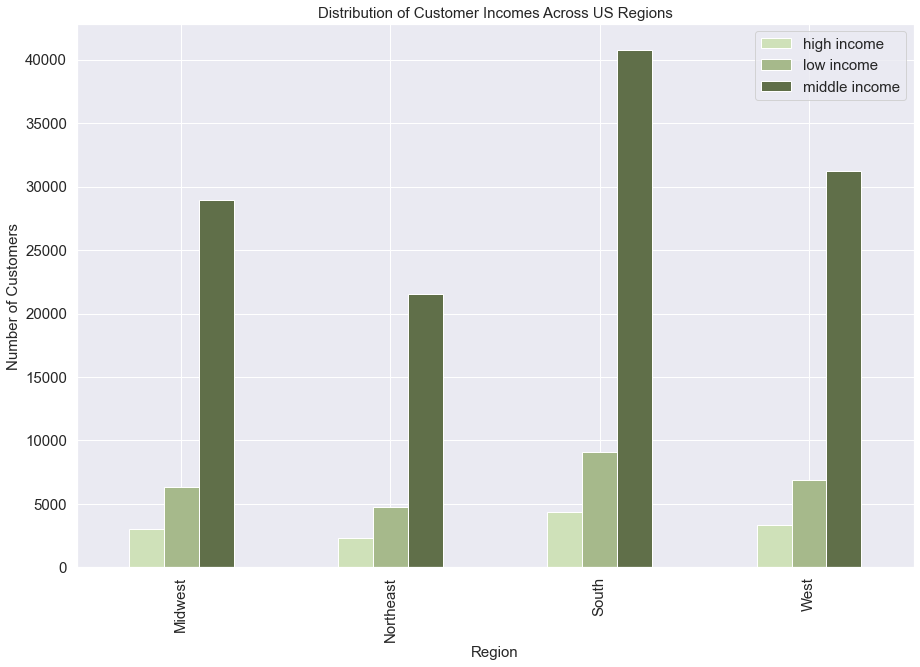

In [10]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart
bar_income_region=income_region.plot.bar(color=['#cfe1b9', '#a6b98b', '#606f49'], fontsize=15)
plt.title('Distribution of Customer Incomes Across US Regions', fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.legend(fontsize=15)

## Pet owners profile regional distrbution

In [11]:
#creating crosstab for region and age group
pet_region = pd.crosstab(df_nodup['region'],df_nodup['pet_owner_flag'])
pet_region

pet_owner_flag,non pet owner,pet owner
region,,
Midwest,35263,3113
Northeast,26282,2299
South,49868,4325
West,38043,3438


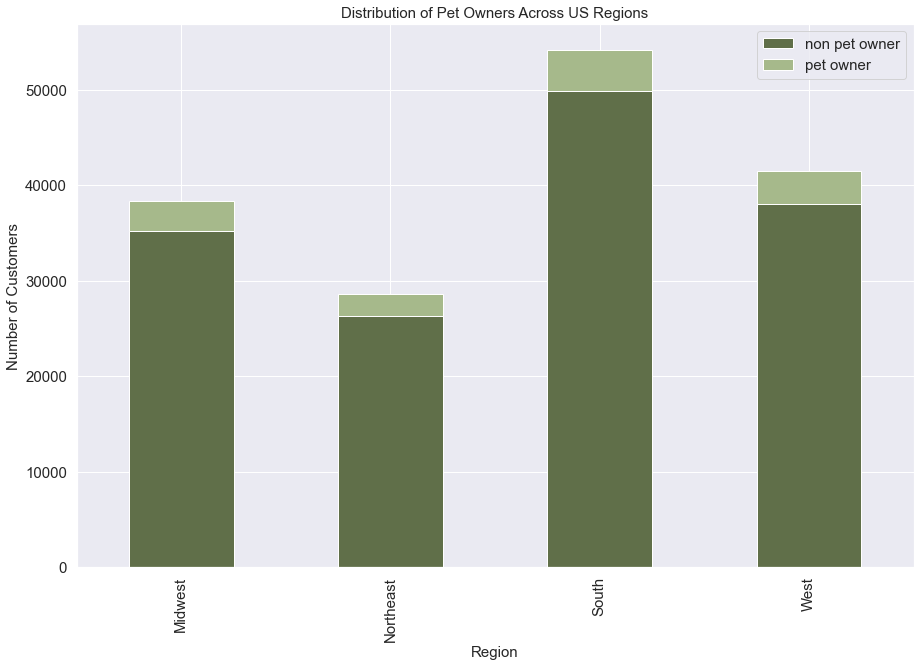

In [12]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart
pet_region_bar=pet_region.plot.bar(stacked = True, color=['#606f49', '#a6b98b'], fontsize=15)
plt.title('Distribution of Pet Owners Across US Regions', fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.legend(fontsize=15)

## Single caretakers profile regional distrbution


In [13]:
#creating crosstab for region and age group
single_caretaker_region = pd.crosstab(df_nodup['region'],df_nodup['single_caretaker_flag'])
single_caretaker_region

single_caretaker_flag,no,yes
region,,
Midwest,26970,1840
Northeast,20100,1226
South,38052,2604
West,29174,1938


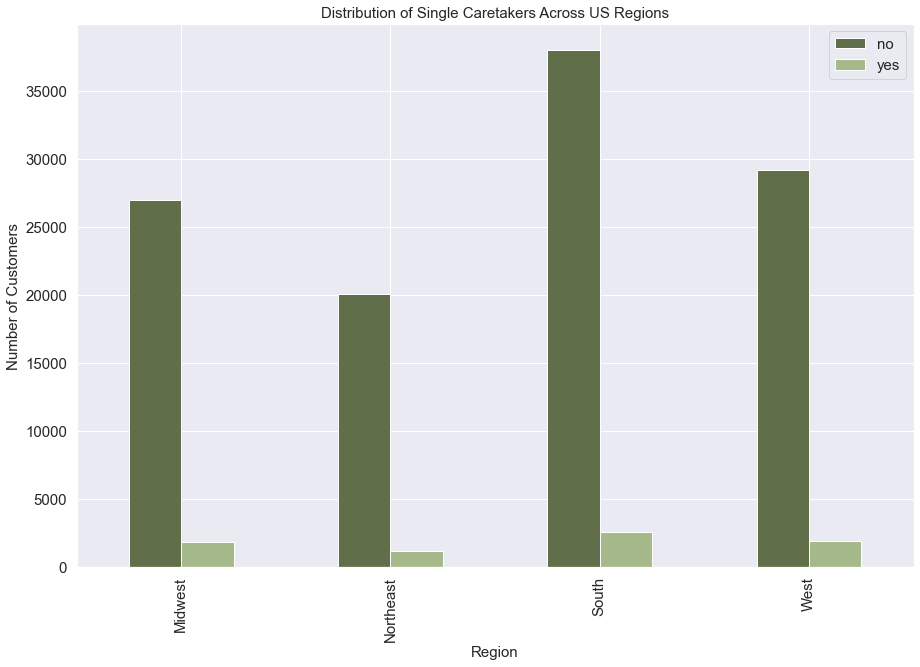

In [14]:
#setting chart size
sns.set(rc = {'figure.figsize':(15,10)})

#plotting chart
single_caretaker_region_bar=single_caretaker_region.plot.bar(color=['#606f49', '#a6b98b'], fontsize=15)
plt.title('Distribution of Single Caretakers Across US Regions', fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Customers', fontsize=15)
plt.legend(fontsize=15)



# 03. Departmental Analysis by Profiles


### Orders Made Per Department - Bar Chart

In [15]:
#Number of orders per department
df['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Text(0.5, 1.0, 'Orders Made Per Department')

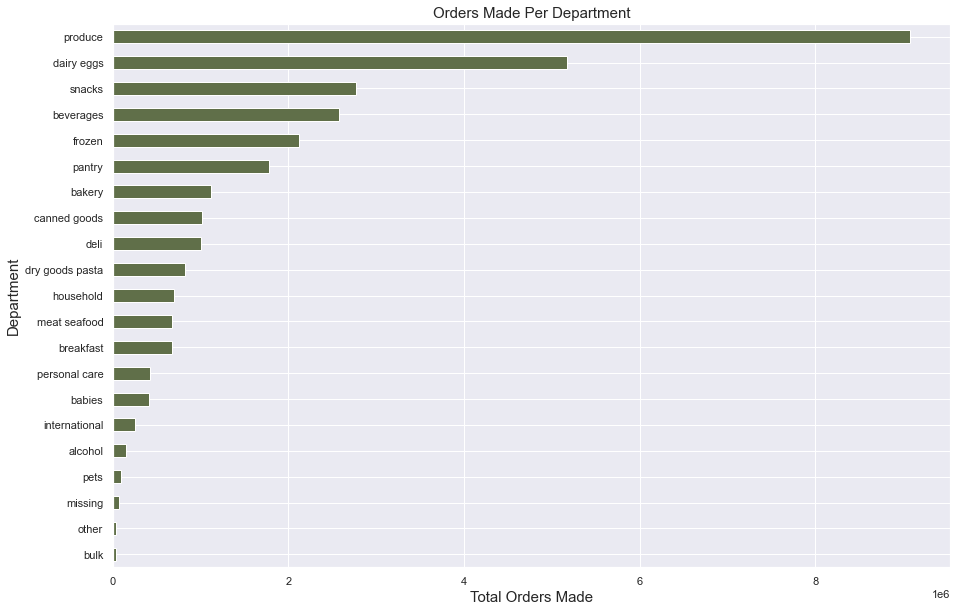

In [16]:
#bar chart showing the orders made for each department
dept_bar=df.department.value_counts().sort_values().plot(kind = 'barh',color=['#606f49'],figsize=[15,10])
plt.ylabel("Department",fontsize=15 )
plt.xlabel("Total Orders Made", fontsize=15)
plt.title("Orders Made Per Department", fontsize=15)

### Age Group

#### Orders by age groups across top 5 departments - stacked bar chart

In [17]:
#Distribution of orders by age groups across  departments
age_department=pd.crosstab(df['department'], df['age_group'])
age_department

age_group,early_adult,late_middle_adult,middle_adult,older_adult
department,,,,
alcohol,40217,46579,21138,36693
babies,107300,129910,66978,106204
bakery,298721,350804,175306,295997
beverages,677017,814687,396177,684020
breakfast,180323,211274,103957,175296
bulk,9021,10298,5187,8945
canned goods,270785,315774,158006,267509
dairy eggs,1386301,1612490,810319,1368072
deli,266470,314110,158055,265199


In [18]:
#creating subset dataframe with top 5 departments
df_top_department=df.loc[df['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])]

In [19]:
#creating subset dataframe with top 5 departments
df_top_department=df.loc[df['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])]

In [20]:
#creating cross tabs to display labels and age group/departments
age_dept5_norm=pd.crosstab(index=df_top_department['department'], columns=df_top_department['age_group'], normalize='index')
age_dept5_norm=age_dept5_norm.reindex(['early_adult','middle_adult','late_middle_adult', 'older_adult'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
age_dept5_total=pd.crosstab(index=df_top_department['department'], columns=df_top_department['age_group'])
age_dept5_total=age_dept5_total.reindex(['early_adult','middle_adult','late_middle_adult', 'older_adult'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])

In [21]:
age_dept5_total

age_group,early_adult,middle_adult,late_middle_adult,older_adult
department,,,,
produce,2413102,1427214,2830853,2408104
dairy eggs,1386301,810319,1612490,1368072
snacks,740226,430067,867564,728549
beverages,677017,396177,814687,684020
frozen,561564,328768,667149,564250


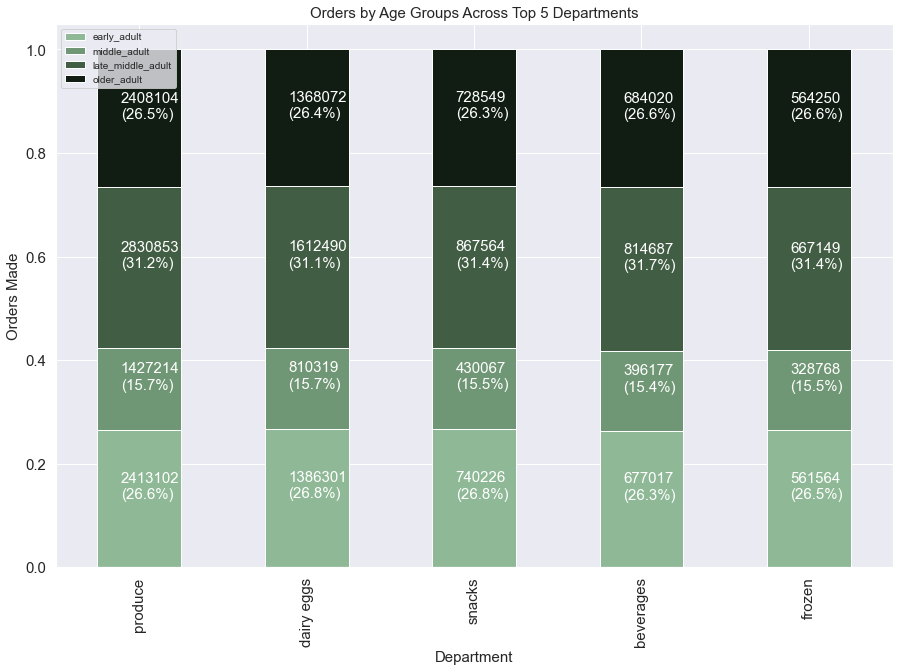

In [22]:
#Distribution of orders by age groups across top-5 departments
bar_age_department=age_dept5_norm.plot.bar(stacked=True, color=['#8fb996', '#709775', '#415d43', '#111d13'], fontsize=15)
plt.title('Orders by Age Groups Across Top 5 Departments', fontsize=15)
plt.xlabel('Department', fontsize=15)
plt.ylabel('Orders Made', fontsize=15)
plt.legend(fontsize=10, loc='upper left')
for n, y in enumerate([*age_dept5_norm.index.values]):
    for (proportion, count, x_loc) in zip(age_dept5_norm.loc[y],
                                         age_dept5_total.loc[y],
                                         age_dept5_norm.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=15)

#### Age groups' weekly shopping trends - Line Chart

In [23]:
#creating a sample of the dataframe. start by setting the seed
np.random.seed(3)
dev = np.random.rand(len(df)) <= 0.7

In [24]:
#store 70% of the sample in the dataframe 'big'
big = df[dev]

In [25]:
#store 30% of the sample in the dataframe 'small'
small = df[~dev]

In [26]:
#checking that the samples add up to the full dataframe length
len(df)

30964564

In [27]:
len(big) + len(small)

30964564

In [29]:
#reducing sample to only necessary columns
df_line = small[['age_group','orders_day_of_week', 'customer_id', 'order_id']]

Text(0, 0.5, 'Order Count')

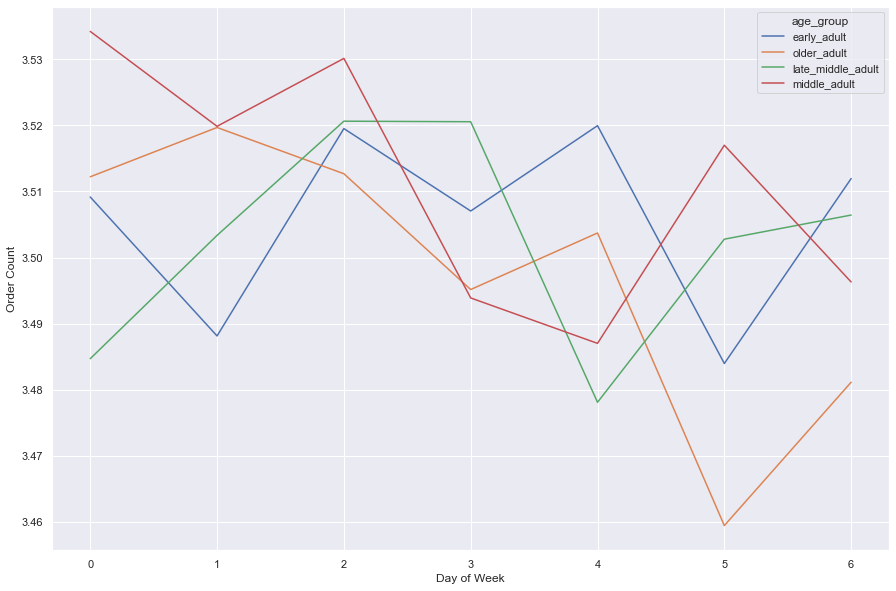

In [30]:
#plotting line chart comparing the weekly shopping habits of different age groups
age_dow_line = sns.lineplot(data = df_line, x='orders_day_of_week', y= df_line['order_id'].value_counts(dropna = False),
             hue="age_group", ci= None)

age_dow_line.set_xlabel("Day of Week")
age_dow_line.set_ylabel("Order Count")

#### Age Groups Hourly Shopping Trends - Line Chart

In [31]:
#creating crosstab of orders placed per hour of day for age groups

age_hour_order=pd.crosstab(df['order_hour_of_day'], df['age_group'])
age_hour_order

age_group,early_adult,late_middle_adult,middle_adult,older_adult
order_hour_of_day,,,,
0,56921,63678,34048,53395
1,29728,33324,17881,28688
2,18362,19373,10498,17458
3,13411,14272,7718,13395
4,13866,15860,7357,13680
5,22413,26043,12676,23286
6,77105,85634,43045,75229
7,229970,269261,130915,233067
8,437956,521941,257755,441458


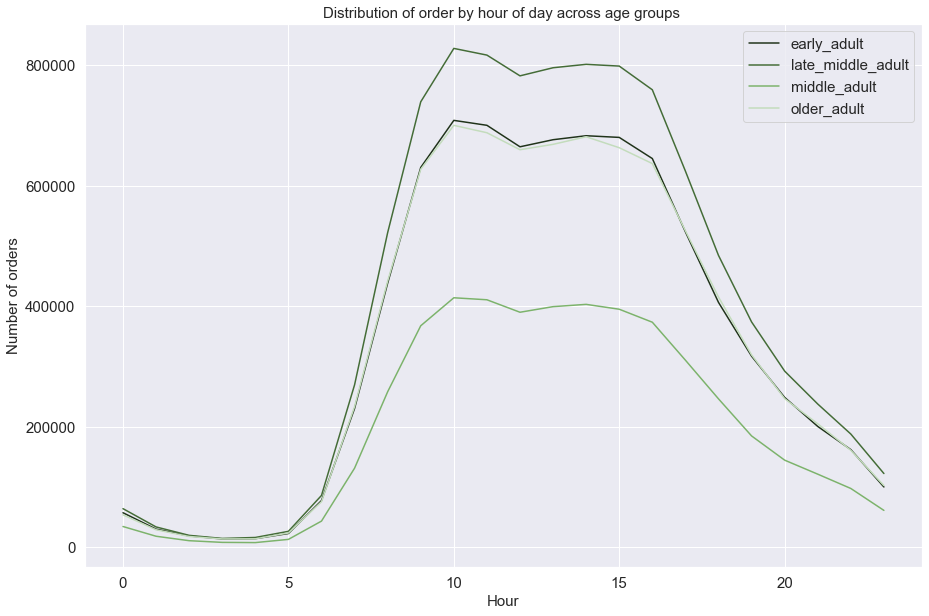

In [32]:
#Plotting linechart of orders by age groups
age_hour_line=age_hour_order.plot(kind='line', color=['#20331a', '#446c37', '#7cb36b', '#c3dcbc'], fontsize=15)
plt.title('Distribution of order by hour of day across age groups ', fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of orders', fontsize=15)
plt.legend(fontsize=15)

### Income Profiles

#### Income group spending trend - stacked bar chart

In [33]:
df.dtypes

order_id                       int32
customer_id                   object
order_number                    int8
orders_day_of_week              int8
order_hour_of_day               int8
days_since_prior_order       float16
new_customer                    bool
product_id                     int32
add_to_cart_order              int32
reordered                       int8
_merge                      category
product_name                  object
aisle_id                        int8
department_id                   int8
prices                       float64
price_label                   object
busiest_days                  object
busiest_period_of_day         object
max_order                       int8
loyalty_flag                  object
mean_order                   float32
spending_flag                 object
median_since_prior_order     float16
frequency_flag                object
gender                        object
state                         object
age                             int8
d

In [118]:
#reducing sample to only necessary columns for weekly shopping habits of different income groups
df_income_dow_line = small[['income_group','orders_day_of_week', 'customer_id', 'order_id']]

Text(0.5, 1.0, 'Order Count Per Day For Income Profiles')

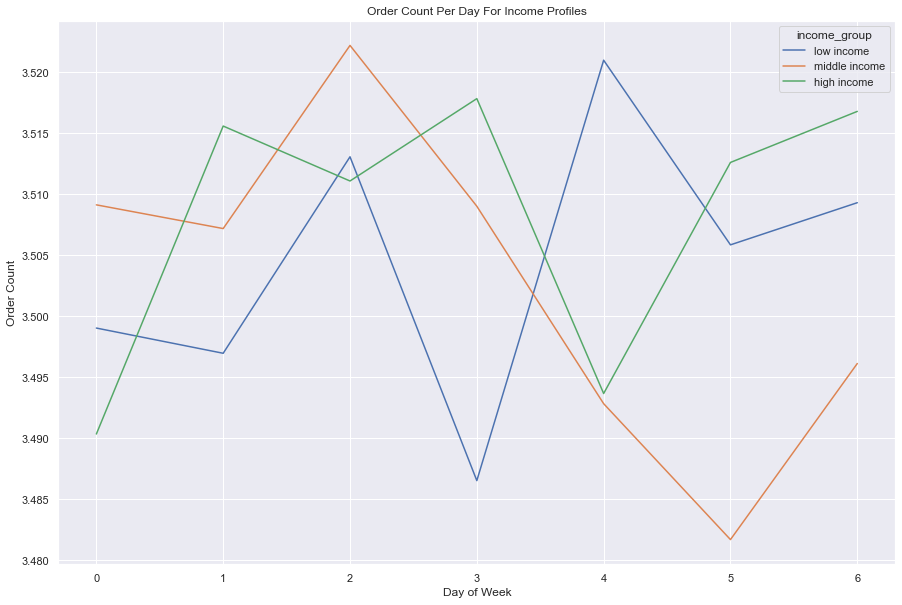

In [120]:
#plotting line chart comparing the weekly shopping habits of different income groups
income_dow_line = sns.lineplot(data = df_income_dow_line, x='orders_day_of_week', y= df_income_dow_line['order_id'].value_counts(dropna = False),
             hue="income_group", ci= None)

income_dow_line.set_xlabel("Day of Week")
income_dow_line.set_ylabel("Order Count")
income_dow_line.set_title("Order Count Per Day For Income Profiles")

In [117]:
#reducing sample to only necessary columns for hourly shopping habits of different income groups
df_income_hour_line = small[['income_group','order_hour_of_day', 'customer_id', 'order_id']]

Text(0.5, 1.0, 'Order Count Per Hour For Income Profiles')

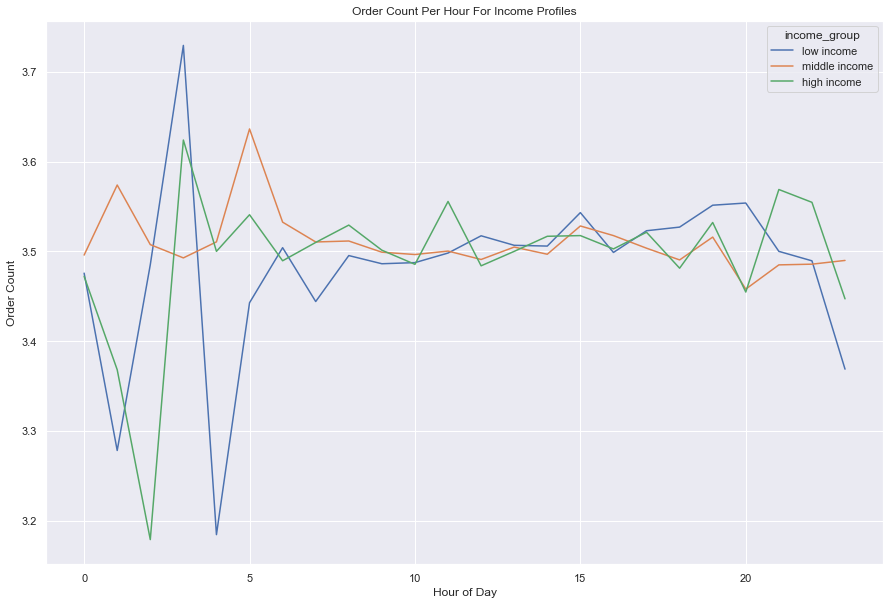

In [123]:
#plotting line chart comparing the weekly shopping habits of different income groups
income_hour_line = sns.lineplot(data = df_income_hour_line, x='order_hour_of_day', y= df_income_hour_line['order_id'].value_counts(dropna = False),
             hue="income_group", ci= None)

income_hour_line.set_xlabel("Hour of Day")
income_hour_line.set_ylabel("Order Count")
income_hour_line.set_title('Order Count Per Hour For Income Profiles')

In [34]:
#creating crosstabs to display labels and income group/price label
income_price=pd.crosstab(index=df['price_label'], columns=df['income_group'], normalize='index')
income_price=income_price.reindex(['low income', 'middle income', 'high income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label=pd.crosstab(index=df['price_label'], columns=df['income_group'])
income_price_label=income_price_label.reindex(['low income', 'middle income', 'high income'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label

income_group,low income,middle income,high income
price_label,,,
Low-range product,1506586,7352226,816028
Mid-range product,97360,569704,60140
High-range product,20601,336477,40875


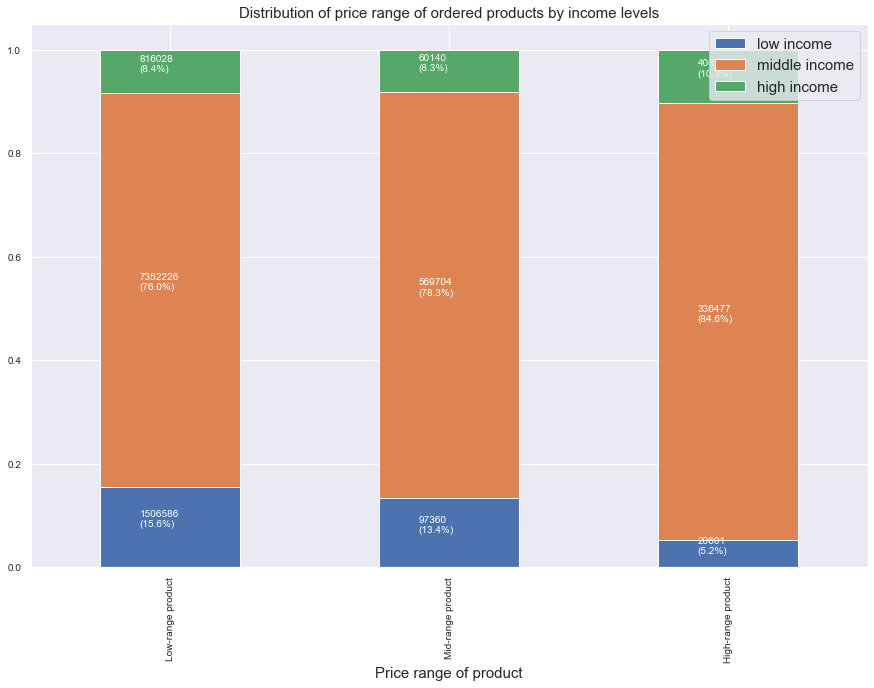

In [36]:
#Comparing income profile and order price range 
bar_income_price=income_price.plot.bar(stacked=True, fontsize=10)
plt.title('Distribution of price range of ordered products by income levels', fontsize=15)
plt.xlabel('Price range of product', fontsize=15)
plt.legend(fontsize=15, loc='best')
for n, y in enumerate([*income_price.index.values]):
    for (proportion, count, x_loc) in zip(income_price.loc[y],
                                         income_price_label.loc[y],
                                         income_price.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=10)

### Income profile and average spending - scatterplot

In [38]:
#reducing 30% sample df created above to necessary columns
df_scatter = small[['income_group','mean_order', 'income']]

Text(0, 0.5, 'Income')

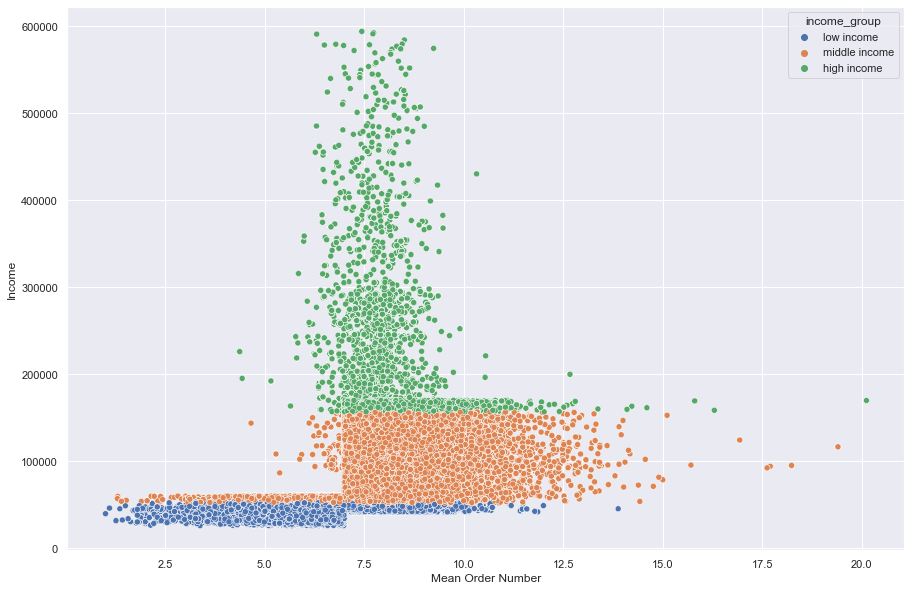

In [39]:
income_mean_scatter = sns.scatterplot(data = df_scatter, x='mean_order', y= 'income',
             hue="income_group", ci= None)
income_mean_scatter.set_xlabel("Mean Order Number")
income_mean_scatter.set_ylabel("Income")

### Pet Owners Profile

In [40]:
#creating crosstab to check the ratio of those who bought from the pets departments and those who didnt
pet_owner_region=pd.crosstab(index=df_nodup['region'], columns=df_nodup['pet_owner_flag'], normalize='index')
pet_owner_region

pet_owner_flag,non pet owner,pet owner
region,,
Midwest,0.918882,0.081118
Northeast,0.919562,0.080438
South,0.920193,0.079807
West,0.917119,0.082881


#### Pet owners in each region - stacked bar chart

In [41]:
#creating crosstabs for bar chart labels
pet_owner_region=pet_owner_region.reindex(['South', 'West','Midwest',  'Northeast'])
pet_owner_region=pet_owner_region.rename(columns={'non pet owner':'Didnt shop pet dept', 'pet owner':'Shopped pet dept'})
pet_region_labels=pd.crosstab(index=df['region'], columns=df['pet_owner_flag'])
pet_region_labels=pet_region_labels.reindex(['South', 'West','Midwest',  'Northeast'])
pet_region_labels=pet_region_labels.rename(columns={'non pet owner':'Didnt shop pet dept', 'pet owner':'Shopped pet dept'})

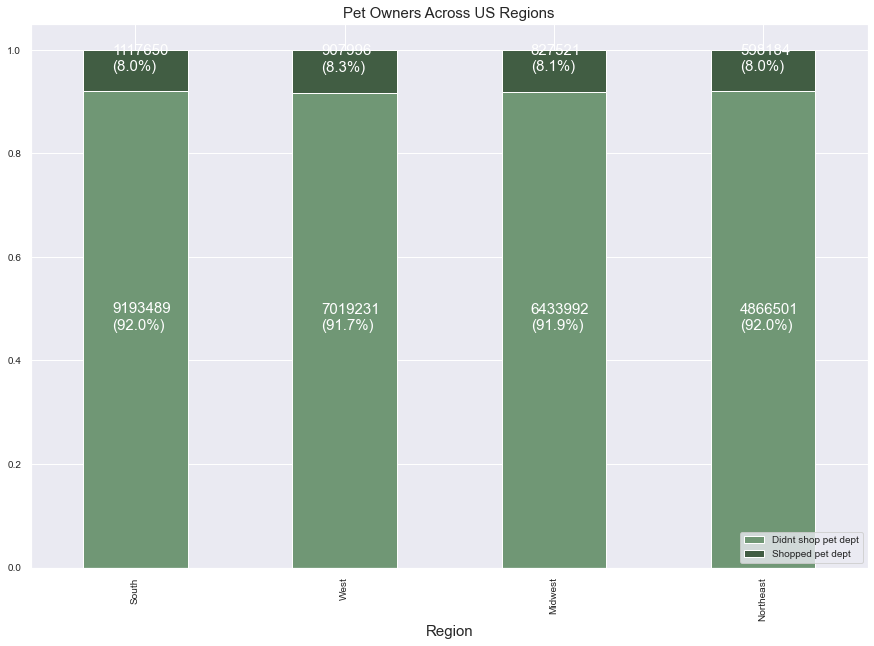

In [42]:
pet_region_frequency=pet_owner_region.plot.bar(stacked=True,color=['#709775', '#415d43', '#8fb996'], fontsize=10)
plt.title('Pet Owners Across US Regions', fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.legend(fontsize=10, loc='lower right')
for n, y in enumerate([*pet_owner_region.index.values]):
    for (proportion, count, x_loc) in zip(pet_owner_region.loc[y],
                                       pet_region_labels.loc[y],
                                        pet_owner_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=15)

### Single Caretakers Profile

In [43]:
#creating crosstab to check the ratio of single caretakers in each region
singlecare_region=pd.crosstab(index=df_nodup['region'], columns=df_nodup['single_caretaker_flag'], normalize='index')
singlecare_region=singlecare_region.rename(columns={'no':'not a single caretaker', 'yes':'single caretaker'})
singlecare_region

single_caretaker_flag,not a single caretaker,single caretaker
region,,
Midwest,0.936133,0.063867
Northeast,0.942511,0.057489
South,0.935950,0.064050
West,0.937709,0.062291


In [44]:
#creating crosstab to check the ratio of single caretakers who are frequent customers
singlecare_frequent=pd.crosstab(index=df_nodup['frequency_flag'], columns=df_nodup['single_caretaker_flag'], normalize='index')
singlecare_frequent=singlecare_frequent.rename(columns={'no':'not a single caretaker', 'yes':'single caretaker'})
singlecare_frequent

single_caretaker_flag,not a single caretaker,single caretaker
frequency_flag,,
Frequent customer,0.936585,0.063415
Non-frequent customer,0.937171,0.062829
Regular customer,0.939434,0.060566


#### Daily shopping habits of single caretakers - line  chart

In [45]:
#creating crosstab of orders placed per day for the two groups

care_day_order=pd.crosstab(df['orders_day_of_week'], df['single_caretaker_flag'])
care_day_order=care_day_order.rename(columns={'no':'not a single caretaker', 'yes':'single caretaker'})
care_day_order

single_caretaker_flag,not a single caretaker,single caretaker
orders_day_of_week,,
0,4150704,280828
1,3789854,259482
2,2829759,192366
3,2578075,174418
4,2546521,173214
5,2824095,195460
6,3024703,205404


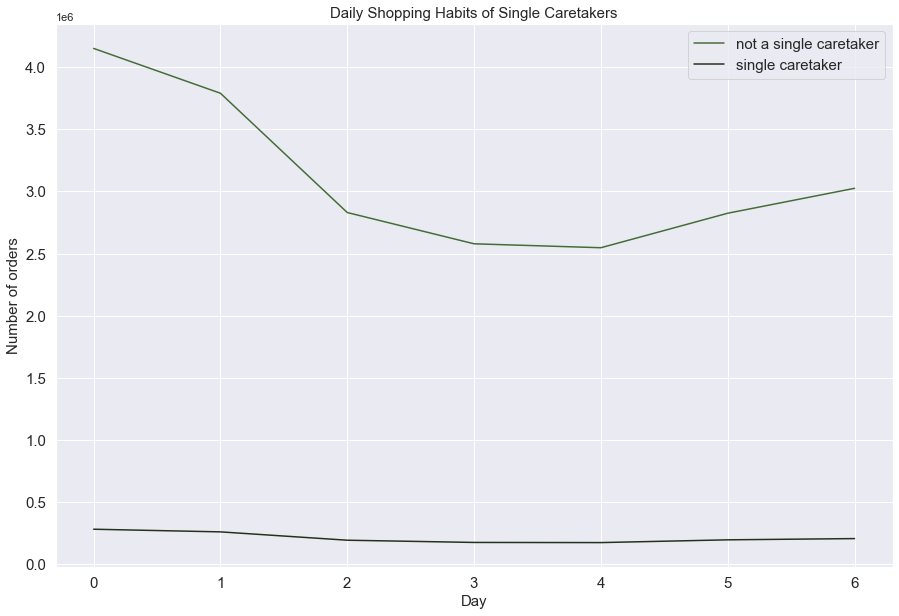

In [46]:
care_dow_line = care_day_order.plot(kind='line', color=['#446c37', '#20331a'], fontsize=15)
plt.title('Daily Shopping Habits of Single Caretakers', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Number of orders', fontsize=15)
plt.legend(fontsize=15)

#### Hourly shopping habits of single caretakers - line  chart

In [47]:
#creating crosstab of orders placed per hour for the two groups

care_hour_order=pd.crosstab(df['order_hour_of_day'], df['single_caretaker_flag'])
care_hour_order=care_day_order.rename(columns={'no':'not a single caretaker', 'yes':'single caretaker'})
care_hour_order

single_caretaker_flag,not a single caretaker,single caretaker
orders_day_of_week,,
0,4150704,280828
1,3789854,259482
2,2829759,192366
3,2578075,174418
4,2546521,173214
5,2824095,195460
6,3024703,205404


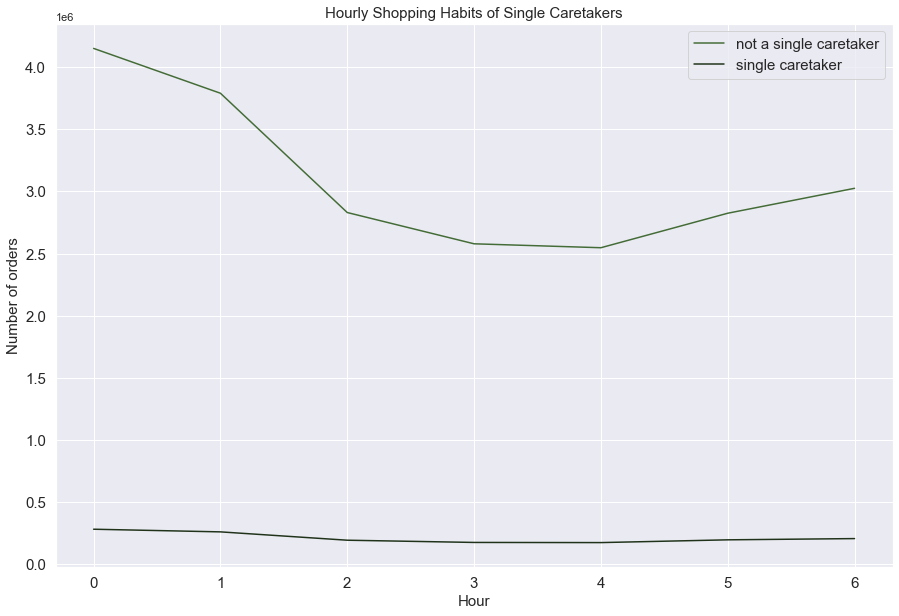

In [48]:
care_hour_line = care_hour_order.plot(kind='line', color=['#446c37', '#20331a'], fontsize=15)
plt.title('Hourly Shopping Habits of Single Caretakers', fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of orders', fontsize=15)
plt.legend(fontsize=15)

# 04. Further Analyses

## Orders Per Hour - Line Chart

In [49]:
#creating df of orders placed per hour 
hour_order=df['order_hour_of_day'].value_counts().rename_axis('Hour of Day').reset_index(name='Order Count')
hour_order

,Hour of Day,Order Count
0,10,2649744
1,11,2614880
2,14,2567903
3,13,2539276
4,15,2535966
5,12,2495795
6,16,2413681
7,9,2363611
8,17,1982345
9,8,1659110


Text(0, 0.5, 'Number of Orders')

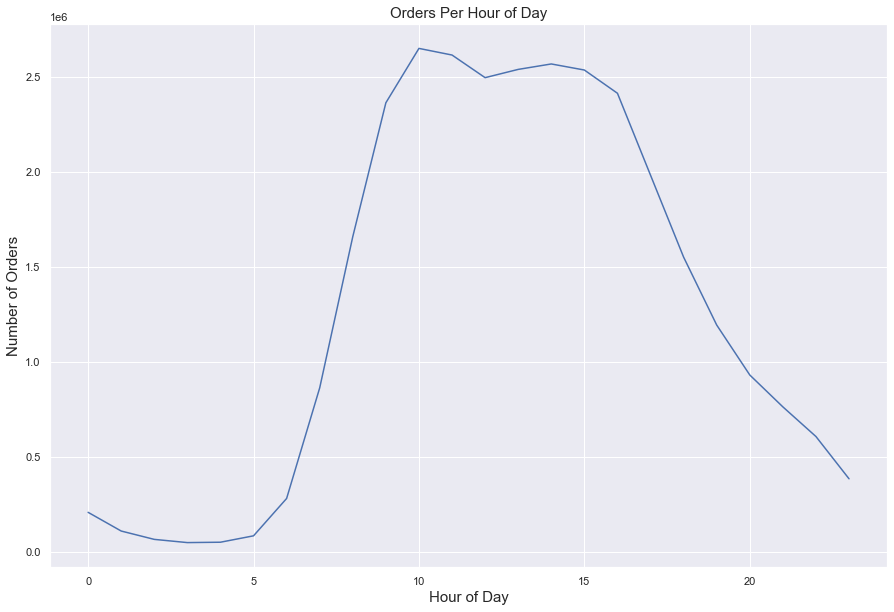

In [50]:
#Line chart of orders by hour of day
hour_order_line=sns.lineplot(data=hour_order, x='Hour of Day', y='Order Count')
hour_order_line.axes.set_title("Orders Per Hour of Day",fontsize=15)
hour_order_line.set_xlabel("Hour of Day",fontsize=15)
hour_order_line.set_ylabel("Number of Orders",fontsize=15)


## Orders Per Day - Line Chart

In [51]:
#creating df of orders placed per day 
day_order=df['orders_day_of_week'].value_counts().rename_axis('Day of Week').reset_index(name='Order Count')
day_order

,Day of Week,Order Count
0,0,5908610
1,1,5411686
2,6,4291304
3,5,4033729
4,2,4024706
5,3,3669535
6,4,3624994


Text(0, 0.5, 'Number of Orders')

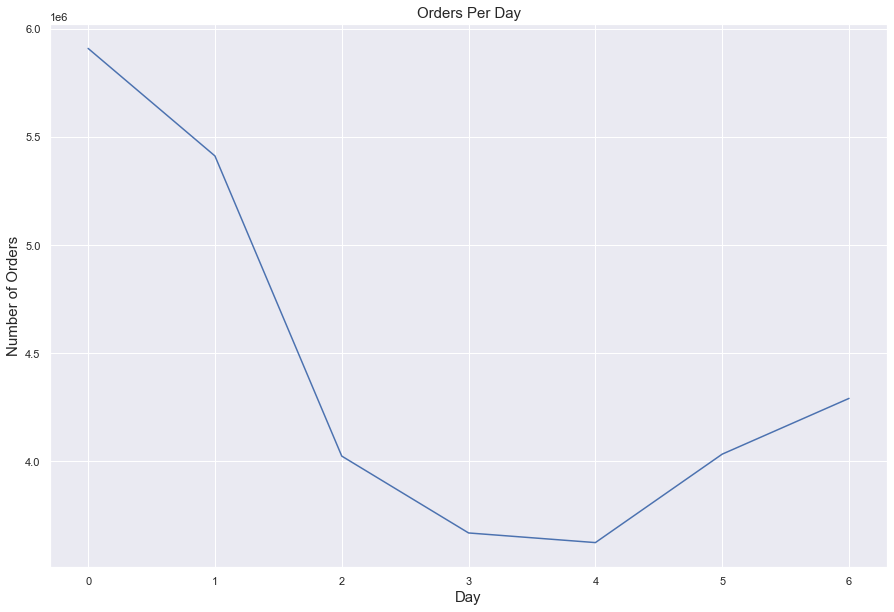

In [52]:
#Line chart of orders by day
day_order_line=sns.lineplot(data=day_order, x='Day of Week', y='Order Count')
day_order_line.axes.set_title("Orders Per Day",fontsize=15)
day_order_line.set_xlabel("Day",fontsize=15)
day_order_line.set_ylabel("Number of Orders",fontsize=15)

## Price Per Hour - Line Chart

Text(0, 0.5, 'Average Price of Order')

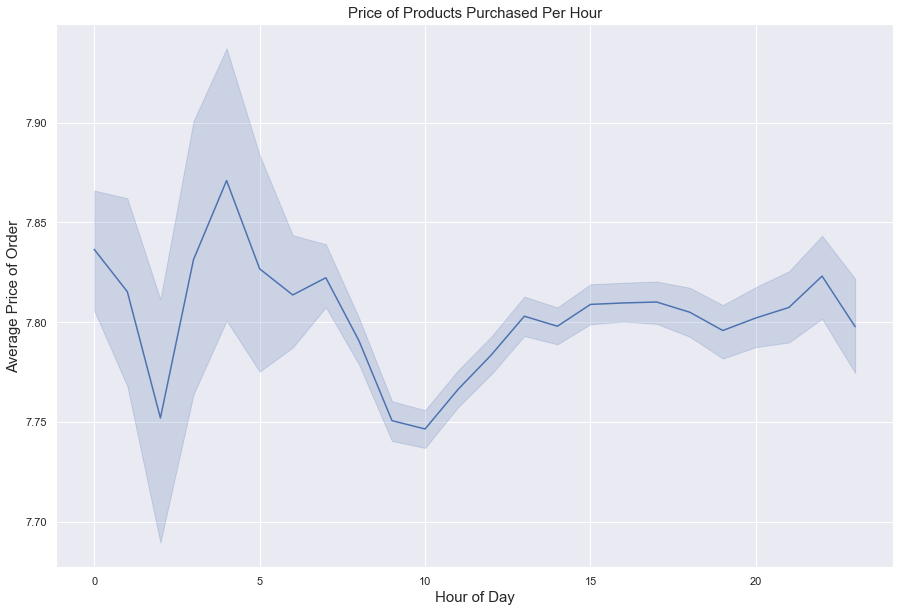

In [53]:
#Creating line chart of average price of products purchased per hour
line_price_hour=sns.lineplot(data=small, x='order_hour_of_day', y='prices')
line_price_hour.axes.set_title("Price of Products Purchased Per Hour", fontsize=15)
line_price_hour.set_xlabel("Hour of Day",fontsize=15)
line_price_hour.set_ylabel("Average Price of Order",fontsize=15)

## Loyalty Status Distribution - Pie Chart

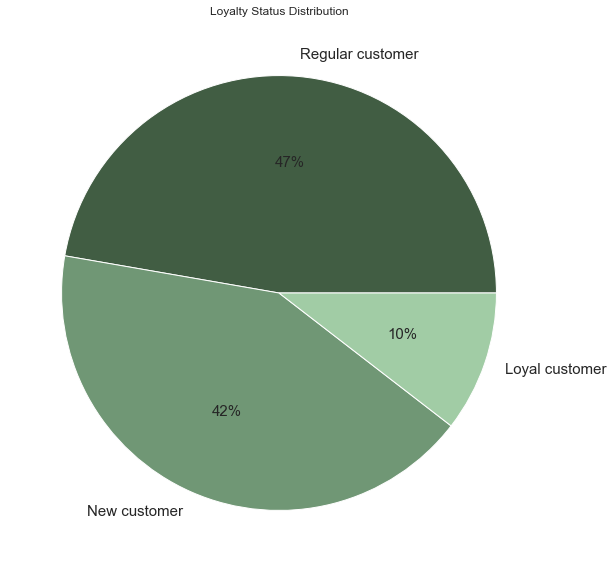

In [54]:
loyalty_dist=df_nodup['loyalty_flag'].value_counts().plot.pie(label='',
                                                 autopct=('%1.f%%'), 
                                                 colors=['#415d43', '#709775', '#a1cca5'],
                                                 title=  "Loyalty Status Distribution", fontsize=15)

## Age Profile Loyalty Status Distribution - Pie Charts

In [55]:
#creating crosstab between age groups and loyalty status
age_loyalty=pd.crosstab(df_nodup['age_group'], df_nodup['loyalty_flag'])
age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
early_adult,4454,18323,20374
late_middle_adult,5365,21577,24051
middle_adult,2647,10658,11932
older_adult,4551,18192,20507


<AxesSubplot:title={'center':'Age Profile Loyal Customer Distribution'}>

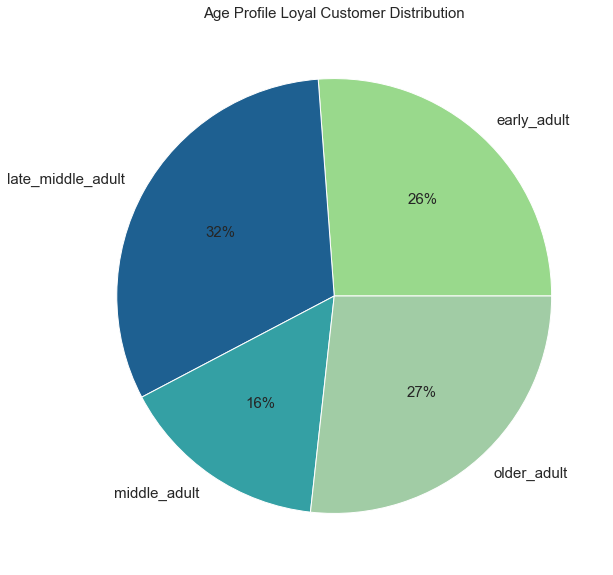

In [56]:
#Creating pie chart of loyal customer distribution among age groups
pie_loyal_age=age_loyalty['Loyal customer'].plot.pie(label='',
                                                     autopct=('%1.f%%'), 
                                                     colors=['#99d98c', '#1e6091', '#34a0a4', '#a1cca5'], 
                                                     textprops={'fontsize': 15})
plt.title('Age Profile Loyal Customer Distribution', fontsize=15)
pie_loyal_age

## Income Profile Loyalty Status Distribution - Pie Chart

In [57]:
#creating crosstab between age groups and loyalty status
income_loyalty=pd.crosstab(df_nodup['income_group'], df_nodup['loyalty_flag'])
income_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
high income,1490,5175,6344
low income,2312,12785,12034
middle income,13215,50790,58486


<AxesSubplot:title={'center':'Income Profile Loyal Customer Distribution'}>

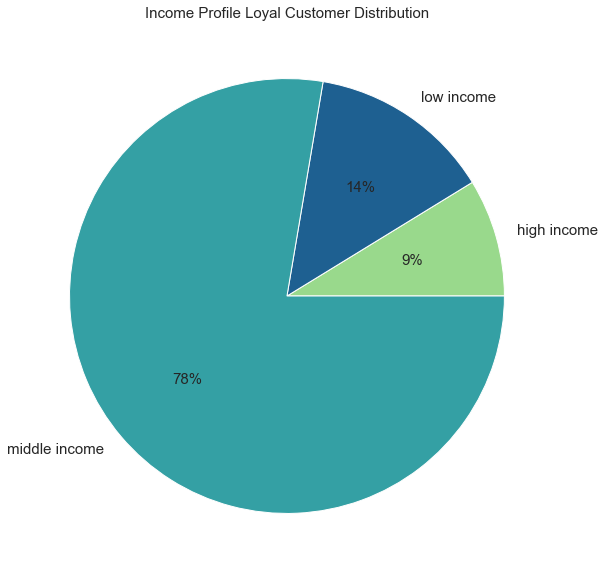

In [58]:
#Creating pie chart of loyal customer distribution among age groups
pie_loyal_income=income_loyalty['Loyal customer'].plot.pie(label='',
                                                     autopct=('%1.f%%'), 
                                                     colors=['#99d98c', '#1e6091', '#34a0a4'], 
                                                     textprops={'fontsize': 15})
plt.title('Income Profile Loyal Customer Distribution', fontsize=15)
pie_loyal_income

## Pet Owner Profile Loyalty Status Distribution - Pie Chart

In [59]:
#creating crosstab between pet profile and loyalty status
pet_loyalty=pd.crosstab(df_nodup['pet_owner_flag'], df_nodup['loyalty_flag'])
pet_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
pet_owner_flag,,,
non pet owner,15066,64567,69823
pet owner,1951,4183,7041


<AxesSubplot:title={'center':'Pet Owner Loyal Customer Distribution'}>

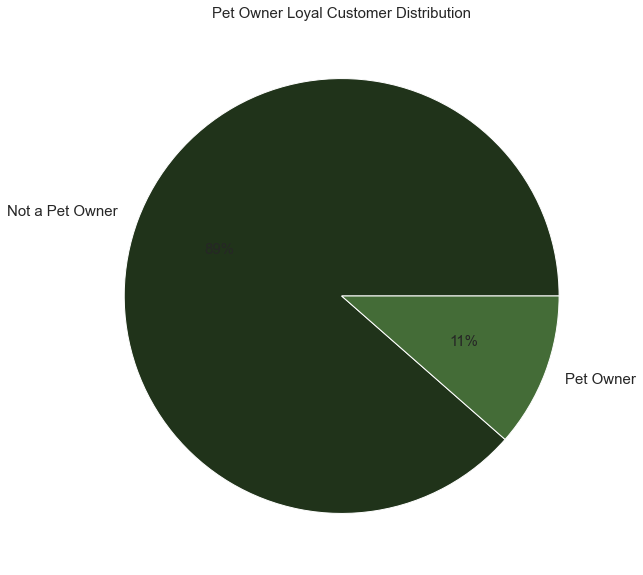

In [60]:
#Creating pie chart of loyal customer distribution among pet profile
pie_loyal_pet=pet_loyalty['Loyal customer'].plot.pie(label='',
                                                     autopct=('%1.f%%'), 
                                                     colors=['#20331a', '#446c37', '#7cb36b', '#c3dcbc'], 
                                                     textprops={'fontsize': 15},
                                                     labels=['Not a Pet Owner', 'Pet Owner']
                                                     )
plt.title('Pet Owner Loyal Customer Distribution', fontsize=15)
pie_loyal_pet

## Single Caretaker Profile Loyalty Status Distribution - Pie Chart

In [61]:
#creating crosstab between single ccaretaker profile and loyalty status
caretaker_loyalty=pd.crosstab(df_nodup['single_caretaker_flag'], df_nodup['loyalty_flag'])
caretaker_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
single_caretaker_flag,,,
no,11940,48332,54024
yes,810,3162,3636


<AxesSubplot:title={'center':'Single Caretaker Loyal Customer Distribution'}>

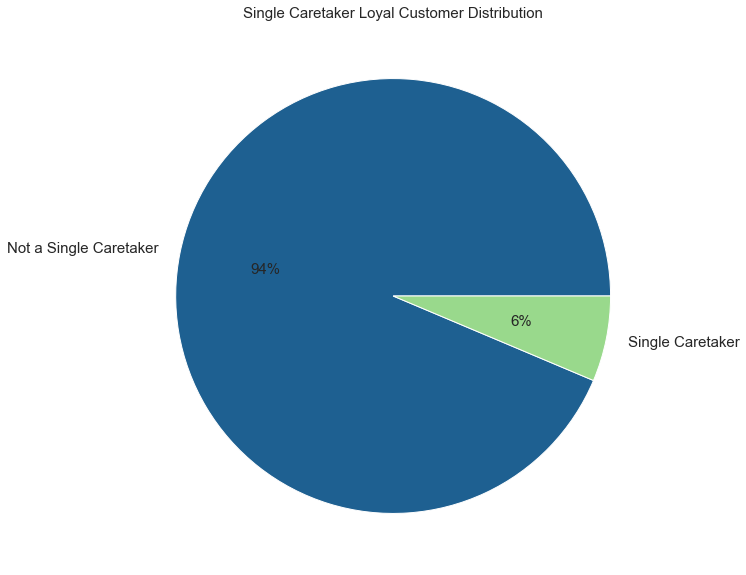

In [62]:
#Creating pie chart of loyal customer distribution among pet profile
pie_loyal_caretaker=caretaker_loyalty['Loyal customer'].plot.pie(label='',
                                                     autopct=('%1.f%%'), 
                                                     colors=['#1e6091', '#99d98c'], 
                                                     textprops={'fontsize': 15},
                                                     labels=['Not a Single Caretaker', 'Single Caretaker']
                                                     )
plt.title('Single Caretaker Loyal Customer Distribution', fontsize=15)
pie_loyal_caretaker

In [107]:
#creating crosstab between single ccaretaker profile and order frequency 
caretaker_frequency=pd.crosstab(df_nodup['frequency_flag'], df_nodup['single_caretaker_flag'])
caretaker_frequency=caretaker_frequency.rename(columns={'no':'Not a single caretaker', 'yes':'Single caretaker'})
caretaker_frequency


single_caretaker_flag,Not a single caretaker,Single caretaker
frequency_flag,,
Frequent customer,53405,3616
Non-frequent customer,25790,1729
Regular customer,35101,2263


In [108]:
#creating cross tabs to display labels and age group/departments
caretaker_frequency=pd.crosstab(index=df_nodup['frequency_flag'], columns=df_nodup['single_caretaker_flag'], normalize='index')
caretaker_frequency_label=pd.crosstab(index=df_nodup['frequency_flag'], columns=df_nodup['single_caretaker_flag'])
caretaker_frequency_label=caretaker_frequency_label.rename(columns={'no':'Not a single caretaker', 'yes':'Single caretaker'})
caretaker_frequency_label

single_caretaker_flag,Not a single caretaker,Single caretaker
frequency_flag,,
Frequent customer,53405,3616
Non-frequent customer,25790,1729
Regular customer,35101,2263


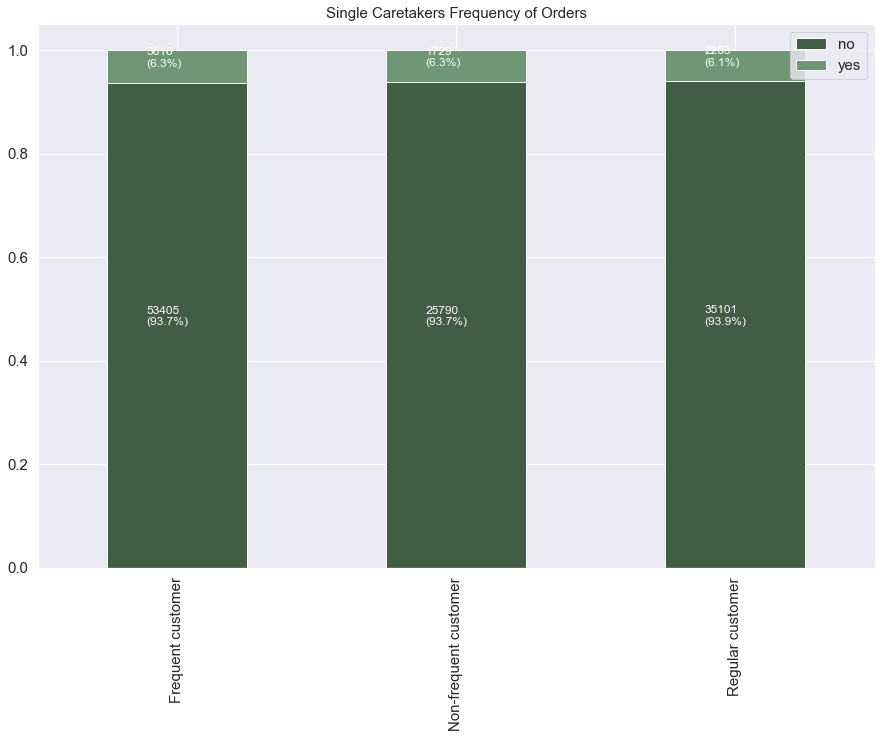

In [109]:
#Frequency of orders based on dependants
caretaker_frequency_bar=caretaker_frequency.plot.bar(stacked=True,color=['#415d43', '#709775', '#a1cca5'], fontsize=15)
plt.title('Single Caretakers Frequency of Orders', fontsize=15)
plt.xlabel('')
plt.legend(fontsize=15, loc='upper right')
for n, y in enumerate([*caretaker_frequency.index.values]):
    for (proportion, count, x_loc) in zip(caretaker_frequency.loc[y],
                                         caretaker_frequency_label.loc[y],
                                         caretaker_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=12)

# 05. Exporting Visualizations

In [79]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))
pet_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_region_bar.png'))
single_caretaker_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_caretaker_region_bar.png'))
dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_bar.png'))
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_department.png'))
age_dow_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dow_line.png'))
age_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_hour_line.png'))
bar_income_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_price.png'))
income_mean_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_mean_scatter.png'))
pet_region_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_region_frequency.png'))
care_dow_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'care_dow_line.png'))
care_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'care_hour_line.png'))
hour_order_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_order_line.png'))
day_order_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'day_order_line.png'))
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'))
loyalty_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dist.png'))
pie_loyal_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyal_age.png'))
pie_loyal_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyal_income.png'))
pie_loyal_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyal_pet.png'))
pie_loyal_caretaker.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyal_caretaker.png'))
caretaker_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'caretaker_frequency_bar.png'))
income_dow_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_dow_line.png'))
income_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_hour_line.png'))